In [65]:
import numpy as np
import pandas as pd
headrow = ['symboling', 'normalized_losses',
          'make', 'fuel_type', 'aspiration' ,
          'num_doors', 'body_style', 
          'drive_wheels', 'engine_location', 
          'wheel_base' , 'length', 'width', 'height',
          'curb_weight', 'engine_type', 'num_cylinders' ,
          'engine_size', 'fuel_system', 'bore', 'stroke',
          'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
          'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names = headrow)

In [66]:
cars.head()
#price is the target column
#symboling, normalized_losses, wheel_base, length, width, height, 
#curb weight, engine size, bore, stroke, compression ratio
#horsepower, peak_rpm, city mpg, highway mpg, price are numeric
#price is the target column


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [67]:
cars['normalized_losses'] = cars['normalized_losses'].replace('?',np.NaN)
 

In [68]:
cars['normalized_losses']  = cars['normalized_losses'].dropna()
cars = cars.replace('?',np.NaN)
cars = cars.dropna()
len(cars)

159

In [69]:
carscopy = cars[['symboling', 'normalized_losses','wheel_base',
                 'engine_size', 'length', 'width', 'height',
                 'curb_weight' ,'bore','stroke','compression_ratio'
                ,'horsepower','peak_rpm','city_mpg','highway_mpg'
                ,'price']]


In [70]:
carscopy = carscopy.astype(float)
carscopy.head()

,symboling,normalized_losses,wheel_base,engine_size,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2.0,164.0,99.8,109.0,176.6,66.2,54.3,2337.0,3.19,3.4,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,136.0,176.6,66.4,54.3,2824.0,3.19,3.4,8.0,115.0,5500.0,18.0,22.0,17450.0
6,1.0,158.0,105.8,136.0,192.7,71.4,55.7,2844.0,3.19,3.4,8.5,110.0,5500.0,19.0,25.0,17710.0
8,1.0,158.0,105.8,131.0,192.7,71.4,55.9,3086.0,3.13,3.4,8.3,140.0,5500.0,17.0,20.0,23875.0
10,2.0,192.0,101.2,108.0,176.8,64.8,54.3,2395.0,3.50,2.8,8.8,101.0,5800.0,23.0,29.0,16430.0


In [71]:
carscopynormal = (carscopy - carscopy.mean())/(carscopy.std())
    

In [72]:
carscopynormal.head()
        

,symboling,normalized_losses,wheel_base,engine_size,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,1.059564,1.202423,0.297218,-0.335724,0.363282,0.304152,0.176585,-0.257580,-0.411938,0.554950,-0.041428,0.200645,0.829113,-0.413638,-0.322294,0.426052
4,1.059564,1.202423,0.219810,0.550661,0.363282,0.406828,0.176585,0.752917,-0.411938,0.554950,-0.555636,0.623841,0.829113,-1.397706,-1.560840,1.021507
6,0.221401,1.034126,1.458340,0.550661,1.760466,2.973718,0.793662,0.794415,-0.411938,0.554950,-0.427084,0.461073,0.829113,-1.233695,-1.096385,1.065741
8,0.221401,1.034126,1.458340,0.386516,1.760466,2.973718,0.881816,1.296551,-0.636375,0.554950,-0.478505,1.437681,0.829113,-1.561717,-1.870477,2.114592
10,1.059564,1.987808,0.568146,-0.368553,0.380638,-0.414577,0.176585,-0.137233,0.747653,-1.479723,-0.349953,0.168091,1.473229,-0.577650,-0.477113,0.847974


In [73]:
carscopynormal = carscopynormal[carscopynormal <2]
carscopynormal = carscopynormal[carscopynormal >-2]
carscopynormal.head()



,symboling,normalized_losses,wheel_base,engine_size,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,1.059564,1.202423,0.297218,-0.335724,0.363282,0.304152,0.176585,-0.257580,-0.411938,0.554950,-0.041428,0.200645,0.829113,-0.413638,-0.322294,0.426052
4,1.059564,1.202423,0.219810,0.550661,0.363282,0.406828,0.176585,0.752917,-0.411938,0.554950,-0.555636,0.623841,0.829113,-1.397706,-1.560840,1.021507
6,0.221401,1.034126,1.458340,0.550661,1.760466,NaN,0.793662,0.794415,-0.411938,0.554950,-0.427084,0.461073,0.829113,-1.233695,-1.096385,1.065741
8,0.221401,1.034126,1.458340,0.386516,1.760466,NaN,0.881816,1.296551,-0.636375,0.554950,-0.478505,1.437681,0.829113,-1.561717,-1.870477,NaN
10,1.059564,1.987808,0.568146,-0.368553,0.380638,-0.414577,0.176585,-0.137233,0.747653,-1.479723,-0.349953,0.168091,1.473229,-0.577650,-0.477113,0.847974


In [74]:
carscopynormal = carscopynormal.dropna()
len(carscopynormal)
carscopynormal.head()

,symboling,normalized_losses,wheel_base,engine_size,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,1.059564,1.202423,0.297218,-0.335724,0.363282,0.304152,0.176585,-0.257580,-0.411938,0.554950,-0.041428,0.200645,0.829113,-0.413638,-0.322294,0.426052
4,1.059564,1.202423,0.219810,0.550661,0.363282,0.406828,0.176585,0.752917,-0.411938,0.554950,-0.555636,0.623841,0.829113,-1.397706,-1.560840,1.021507
10,1.059564,1.987808,0.568146,-0.368553,0.380638,-0.414577,0.176585,-0.137233,0.747653,-1.479723,-0.349953,0.168091,1.473229,-0.577650,-0.477113,0.847974
11,-0.616761,1.987808,0.568146,-0.368553,0.380638,-0.414577,0.176585,-0.137233,0.747653,-1.479723,-0.349953,0.168091,1.473229,-0.577650,-0.477113,0.932189
12,-0.616761,1.875611,0.568146,1.469876,0.380638,-0.414577,0.176585,0.516373,0.036936,-0.157186,-0.298532,0.819163,-1.854702,-0.905672,-0.631931,1.620365


In [75]:
carscopynormal = carscopynormal/5 + 0.5
carscopynormal.head()

,symboling,normalized_losses,wheel_base,engine_size,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,0.711913,0.740485,0.559444,0.432855,0.572656,0.560830,0.535317,0.448484,0.417612,0.610990,0.491714,0.540129,0.665823,0.417272,0.435541,0.585210
4,0.711913,0.740485,0.543962,0.610132,0.572656,0.581366,0.535317,0.650583,0.417612,0.610990,0.388873,0.624768,0.665823,0.220459,0.187832,0.704301
10,0.711913,0.897562,0.613629,0.426289,0.576128,0.417085,0.535317,0.472553,0.649531,0.204055,0.430009,0.533618,0.794646,0.384470,0.404577,0.669595
11,0.376648,0.897562,0.613629,0.426289,0.576128,0.417085,0.535317,0.472553,0.649531,0.204055,0.430009,0.533618,0.794646,0.384470,0.404577,0.686438
12,0.376648,0.875122,0.613629,0.793975,0.576128,0.417085,0.535317,0.603275,0.507387,0.468563,0.440294,0.663833,0.129060,0.318866,0.373614,0.824073


In [76]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(train, target, dataframe):
    kf = KFold(5, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, carscopynormal[[train]], carscopynormal[target], scoring='neg_mean_squared_error', cv=kf)
    avg_rmse = np.mean(((abs(mses)))**(1/2))
    return avg_rmse
msedict = {}
for c in carscopynormal.columns:
    if c != 'price':
        avg = knn_train_test(c, 'price', carscopynormal)
        msedict[c] = avg
msedict
    
    

{'bore': 0.09414607209819742,
 'city_mpg': 0.07988773106784765,
 'compression_ratio': 0.11911320121407107,
 'curb_weight': 0.06850724212596618,
 'engine_size': 0.07164889599600435,
 'height': 0.08350761457221226,
 'highway_mpg': 0.0687514029265173,
 'horsepower': 0.07328031405428054,
 'length': 0.07041341938929666,
 'normalized_losses': 0.12508118323226242,
 'peak_rpm': 0.12944621527551012,
 'stroke': 0.11391195811535974,
 'symboling': 0.10442682794975484,
 'wheel_base': 0.07904431369554259,
 'width': 0.08052802771400802}

In [77]:
min(msedict.values())
#highway_mpg is the lowest with default

0.06850724212596618

symboling


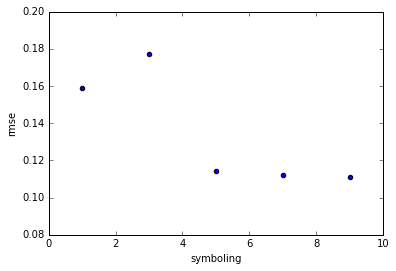

normalized_losses


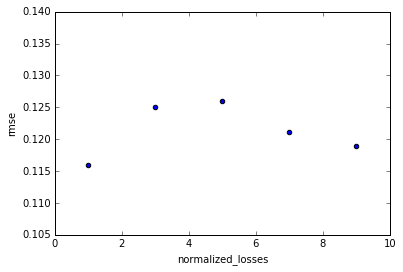

wheel_base


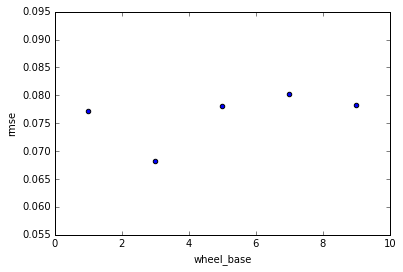

engine_size


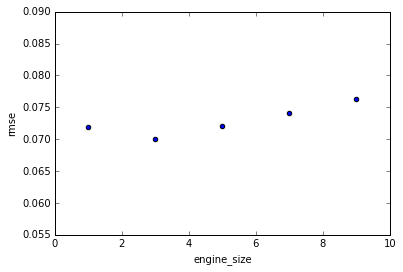

length


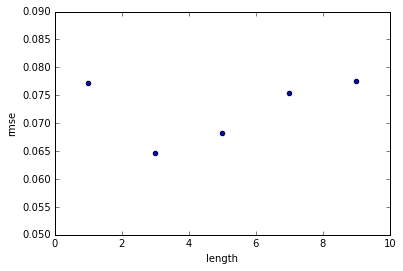

width


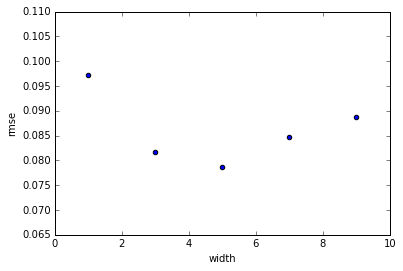

height


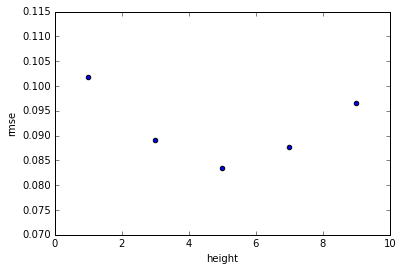

curb_weight


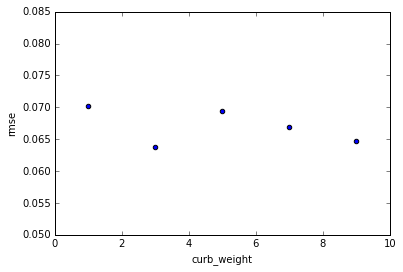

bore


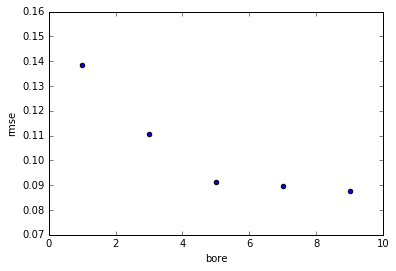

stroke


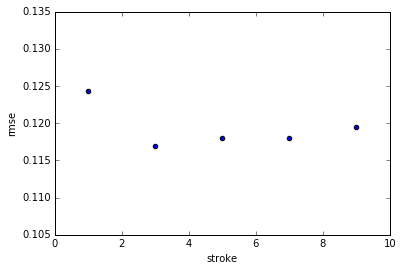

compression_ratio


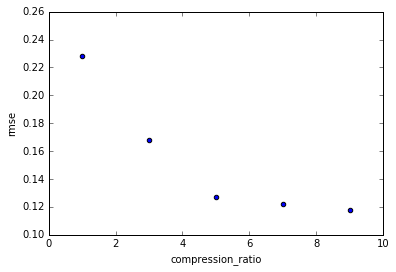

horsepower


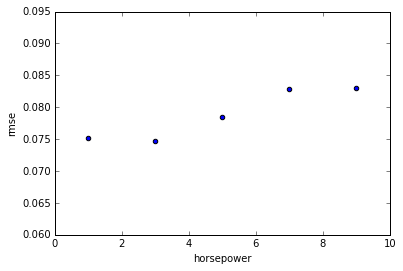

peak_rpm


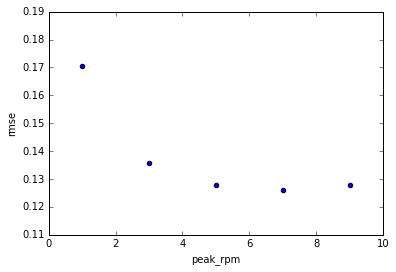

city_mpg


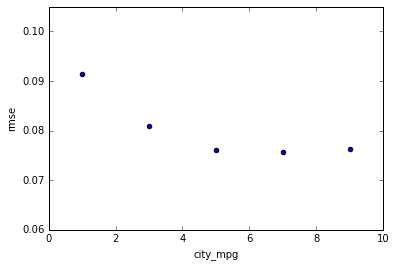

highway_mpg


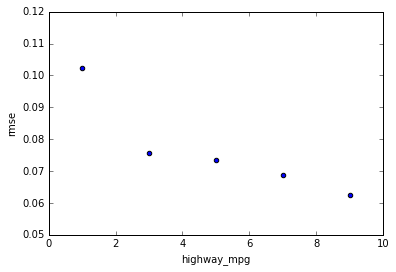

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(train, target, dataframe, k):

    kf = KFold(5, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    mses = cross_val_score(knn, dataframe[[train]], dataframe[target], scoring='neg_mean_squared_error', cv=kf)
    avg_rmse = np.mean(((abs(mses)))**(1/2))

    return avg_rmse

for c in carscopynormal.columns:
    array = [1,3,5,7,9]
    
    #plt.figure()
    if c != 'price':
        values = []
        for i in array:
            avg = knn_train_test(c, 'price', carscopynormal,i)
            values.append(avg)
        print(c)
        plt.scatter(array,values)
        plt.xlabel(c)
        plt.ylabel('rmse')
        plt.show()
        

        

    

In [81]:
(sorted(msedict.items(), key = 
             lambda kv:(kv[1], kv[0])))


[('curb_weight', 0.06850724212596618),
 ('highway_mpg', 0.0687514029265173),
 ('length', 0.07041341938929666),
 ('engine_size', 0.07164889599600435),
 ('horsepower', 0.07328031405428054),
 ('wheel_base', 0.07904431369554259),
 ('city_mpg', 0.07988773106784765),
 ('width', 0.08052802771400802),
 ('height', 0.08350761457221226),
 ('bore', 0.09414607209819742),
 ('symboling', 0.10442682794975484),
 ('stroke', 0.11391195811535974),
 ('compression_ratio', 0.11911320121407107),
 ('normalized_losses', 0.12508118323226242),
 ('peak_rpm', 0.12944621527551012)]

In [ ]:
msedict

In [84]:
def knn_train_test(train, target, dataframe):
    kf = KFold(5, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
    mses = cross_val_score(knn, carscopynormal[train], carscopynormal[target], scoring='neg_mean_squared_error', cv=kf)
    avg_rmse = np.mean(((abs(mses)))**(1/2))
    return avg_rmse
features = ['curb_weight','highway_mpg']
rmse = knn_train_test(features, 'price', carscopynormal)
print(rmse)
features.append('length')
rmse = knn_train_test(features, 'price', carscopynormal)
print(rmse)
features.append('engine_size')
rmse = knn_train_test(features, 'price', carscopynormal)
print(rmse)
features.append('horsepower')
rmse = knn_train_test(features, 'price', carscopynormal)
print(rmse)
features.append('wheel_base')
rmse = knn_train_test(features, 'price', carscopynormal)
print(rmse)


0.05692114032980457
0.058708142981905985
0.06598249474769302
0.06397138339386903
0.06039898950314713


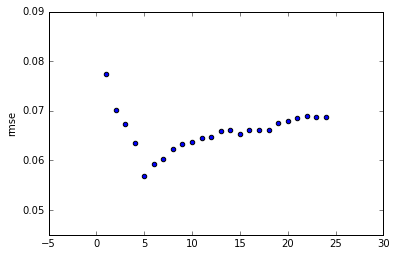

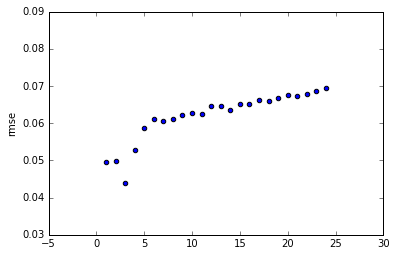

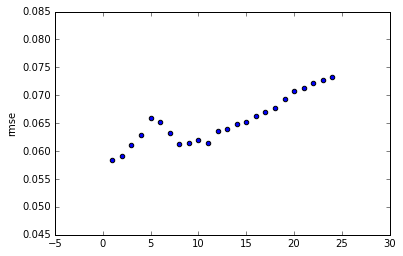

In [88]:
def knn_train_test(train, target, dataframe,k):
    kf = KFold(5, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    mses = cross_val_score(knn, dataframe[train], dataframe[target], scoring='neg_mean_squared_error', cv=kf)
    avg_rmse = np.mean(((abs(mses)))**(1/2))
    return avg_rmse
def test(features):
    array = range(1,25)

        #plt.figure()
    values = []
    for i in array:
        avg = knn_train_test(features, 'price', carscopynormal,i)
        values.append(avg)
    plt.scatter(array,values)
    plt.ylabel('rmse')
    plt.show()

features = ['curb_weight','highway_mpg']
test(features)
features.append('length')
test(features)

features.append('engine_size')
test(features)
#loo